In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
# Split features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


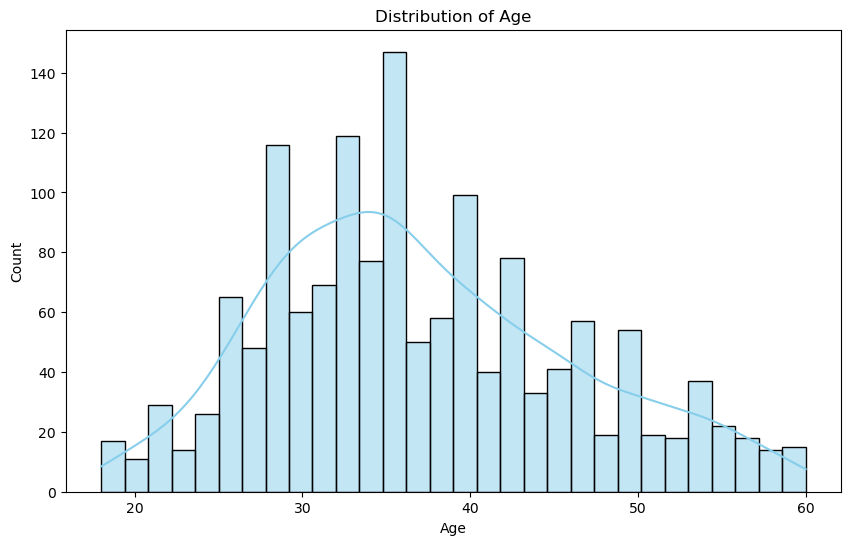

In [13]:
# EDA
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

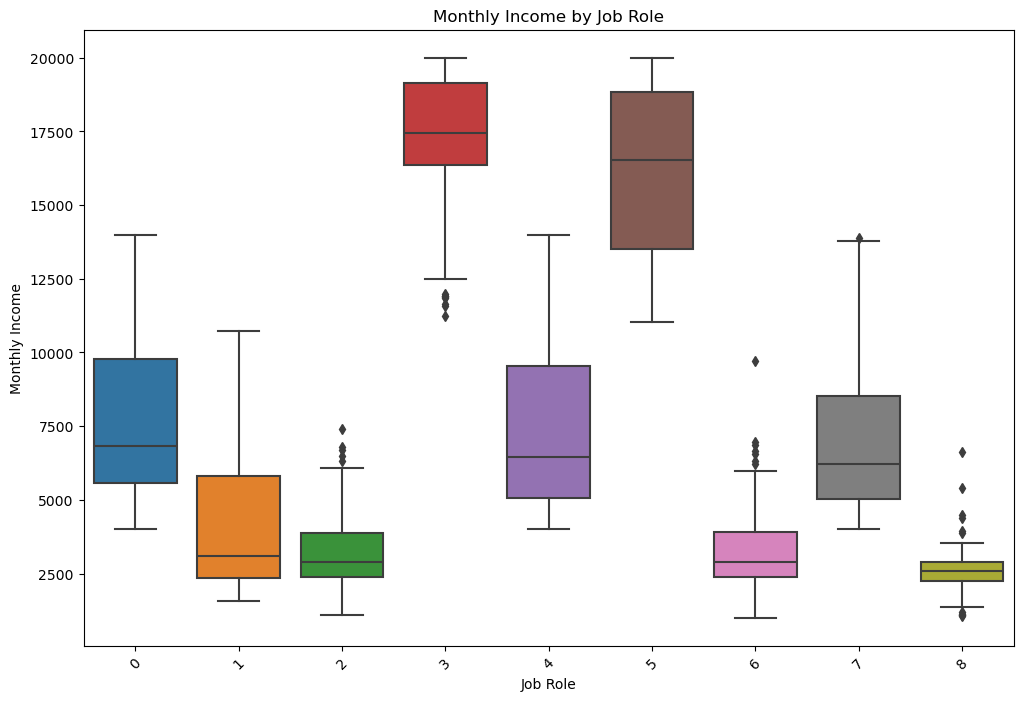

In [15]:
# 3. Monthly Income vs. Job Role
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

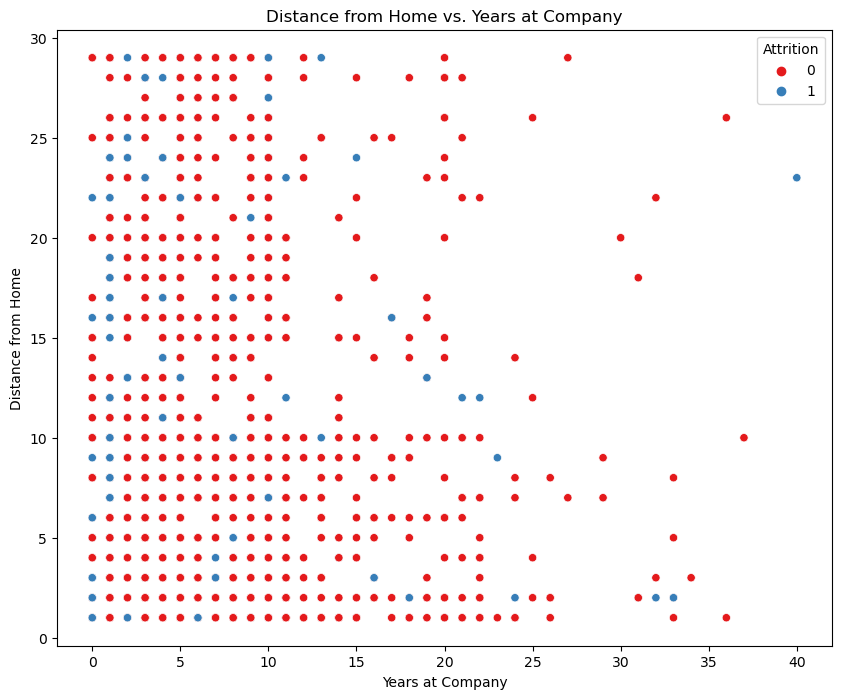

In [27]:
# 10. Distance from Home vs. Years at Company
plt.figure(figsize=(10, 8))
sns.scatterplot(x='YearsAtCompany', y='DistanceFromHome', data=data, hue='Attrition', palette='Set1')
plt.title('Distance from Home vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Distance from Home')
plt.legend(title='Attrition', loc='upper right')
plt.show()

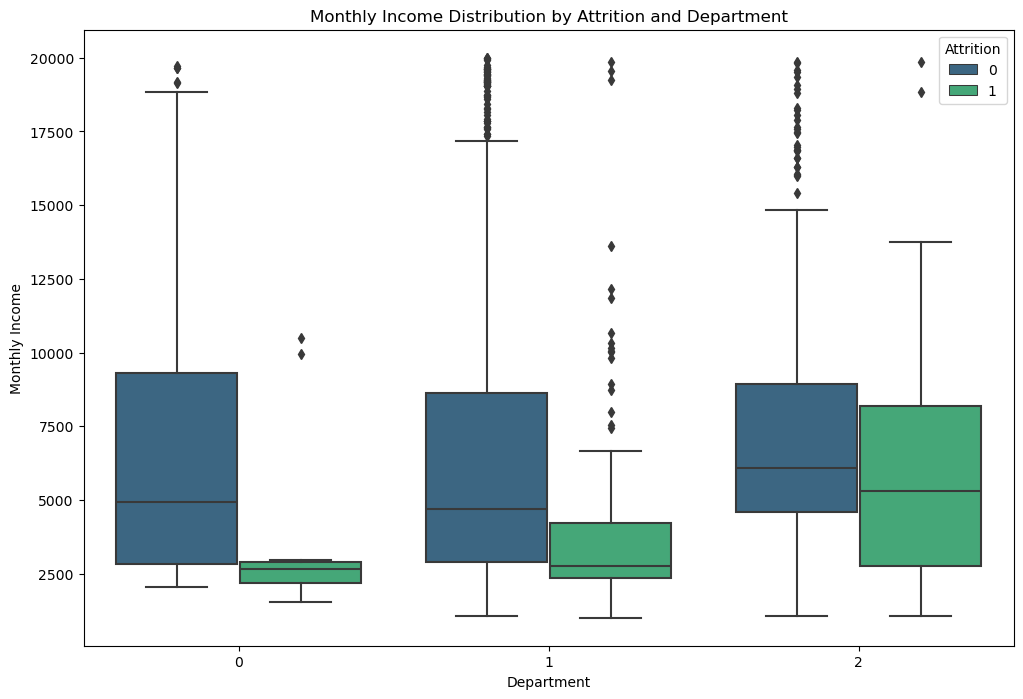

In [28]:
# 9. Monthly Income Distribution by Attrition and Department
plt.figure(figsize=(12, 8))
sns.boxplot(x='Department', y='MonthlyIncome', hue='Attrition', data=data, palette='viridis')
plt.title('Monthly Income Distribution by Attrition and Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', loc='upper right')
plt.show()

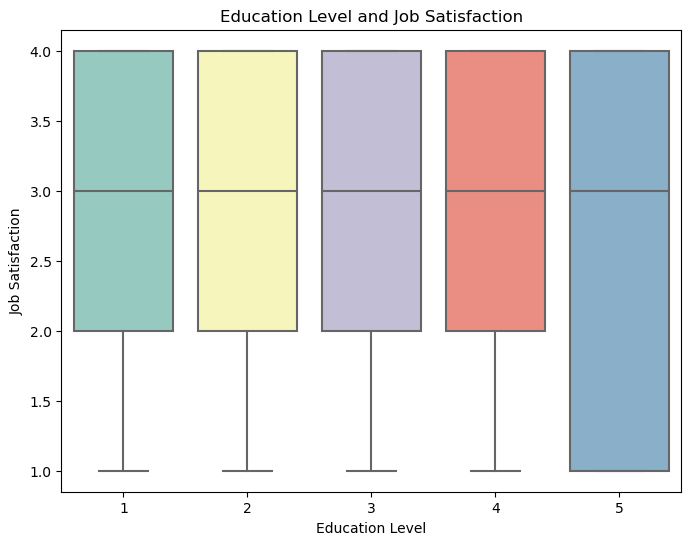

In [29]:
# 7. Education Level and Job Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='JobSatisfaction', data=data, palette='Set3')
plt.title('Education Level and Job Satisfaction')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.show()

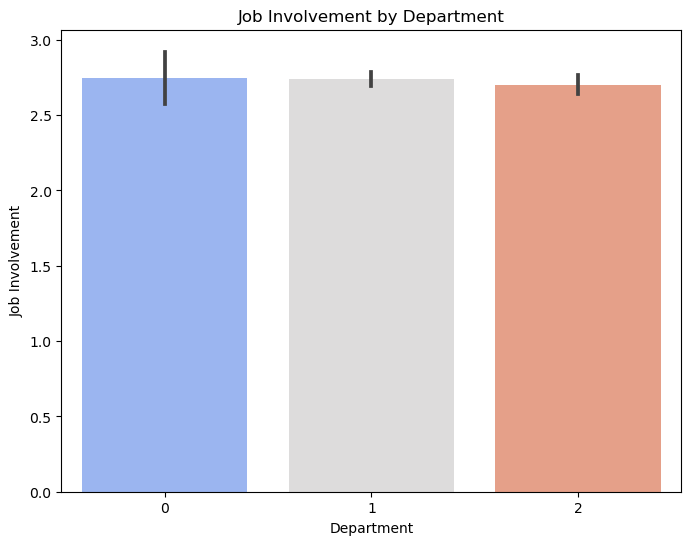

In [30]:
# 8. Job Involvement by Department
plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='JobInvolvement', data=data, palette='coolwarm')
plt.title('Job Involvement by Department')
plt.xlabel('Department')
plt.ylabel('Job Involvement')
plt.show()

In [19]:
# Modeling
# Example: Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
rf_classifier.score(X_train,y_train)

1.0

In [21]:
# Example: XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [22]:
# Prediction
# Example: Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

In [23]:
# Example: XGBoost Classifier
y_pred_xgb = xgb_classifier.predict(X_test)

In [26]:
# Classification Report
# Example: Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [25]:
# Example: XGBoost Classifier
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.59      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.74      0.61      0.64       294
weighted avg       0.85      0.88      0.86       294

